In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tempfile
import uuid
import os
%matplotlib notebook

## create the data (not filestore's responsibility!)

<IPython.core.display.Javascript object>


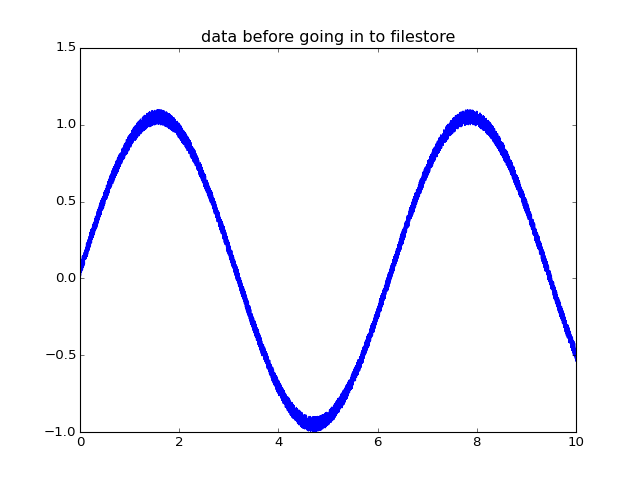

In [2]:
x = np.linspace(0, 10, 10000)
y = np.sin(x) + np.random.random(x.shape)*.1
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('data before going in to filestore')
plt.show()

## save the data to disk (Still not filestore's responsibility!)

In [3]:
data_dir = tempfile.gettempdir()
# generate a totally random name for the file to ensure that there are no
# collisions
x_datapath = os.path.join(data_dir, str(uuid.uuid4()) + '.npy')
y_datapath = os.path.join(data_dir, str(uuid.uuid4()) + '.npy')

np.save(x_datapath, x)
np.save(y_datapath, y)

print('x data path = %s' % x_datapath)
print('y data path = %s' % y_datapath)

x_uid = str(uuid.uuid4())
y_uid = str(uuid.uuid4())

x data path = /tmp/df261529-eab5-43c8-8586-c617a89fda86.npy
y data path = /tmp/c34d52e2-5aa0-45eb-9760-4c9182c15597.npy


## Insert the filestore records that know about these files (filestore's job!)

In [4]:
import filestore.api as fsapi
from filestore.handlers import NpyHandler
# spec is the identifier that will be used later to link
spec = 'npy'

# insert the records into filestore for the x data set
resource_document = fsapi.insert_resource(spec, x_datapath)
datum_document = fsapi.insert_datum(resource_document, x_uid)

# insert the records into filestore for the y data set
resource_document = fsapi.insert_resource(spec, y_datapath)
datum_document = fsapi.insert_datum(resource_document, y_uid)

## Retrieve data from filestore (filestore's job!)

In [5]:
# Here is where the payoff happens for using this framework
# Because all you have to keep track of is the uid for the
# datum document and not the filepath.  Client code can
# then keep track of this uid and use the retrieve api to
# get the contents of the file back in ram

# Make sure that the 'npy' spec has a registered handler
fsapi.register_handler('npy', NpyHandler)
# use the retrieve function to get the data back in ram
x_from_filestore = fsapi.retrieve(x_uid)
y_from_filestore = fsapi.retrieve(y_uid)

## And now we plot again (not filestore's job!)

<IPython.core.display.Javascript object>


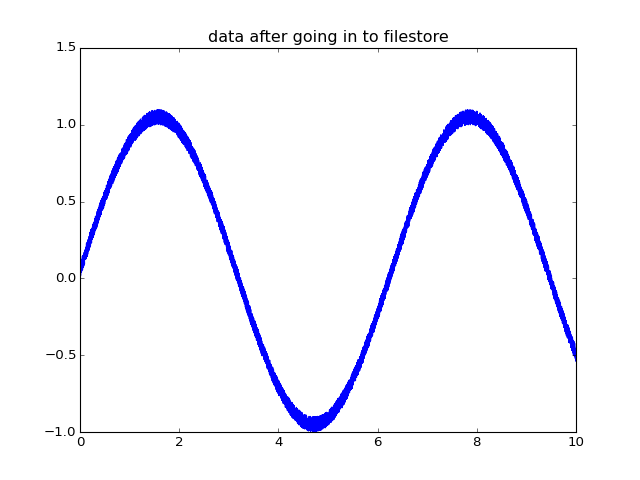

difference between x before and after it went into filestore = 0.0
difference between y before and after it went into filestore = 0.0


In [6]:
fig, ax = plt.subplots()
ax.plot(x_from_filestore, y_from_filestore)
ax.set_title('data after going in to filestore')
plt.show()

print('difference between x before and after it went into filestore = '
      '{}'.format(np.sum(x - x_from_filestore)))
print('difference between y before and after it went into filestore = '
      '{}'.format(np.sum(y - y_from_filestore)))
plt.show()